<a href="https://colab.research.google.com/github/benvictoria21/AnalyzeStocks/blob/master/Eli_Lilly_and_Companyc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install  yfinance

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader
import sqlite3
import yfinance

In [8]:
LLY = "LLY" 

In [9]:
LLY = yfinance.download(LLY)

LLY

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1972-06-01,0.000000,4.070312,4.023438,4.046875,0.247761,456000
1972-06-02,4.054688,4.093750,4.054688,4.093750,0.250631,640000
1972-06-05,4.085938,4.085938,4.023438,4.039062,0.247283,464000
1972-06-06,4.039062,4.039062,4.000000,4.000000,0.244892,796800
1972-06-07,4.000000,4.054688,3.992188,4.046875,0.247761,584000
...,...,...,...,...,...,...
2020-09-21,153.169998,153.660004,149.059998,151.179993,151.179993,3501600
2020-09-22,150.910004,151.570007,149.149994,149.860001,149.860001,2926400
2020-09-23,150.050003,151.589996,148.699997,149.809998,149.809998,3545700


In [10]:
LLY.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1972-06-01,0.000000,4.070312,4.023438,4.046875,0.247761,456000
1972-06-02,4.054688,4.093750,4.054688,4.093750,0.250631,640000
1972-06-05,4.085938,4.085938,4.023438,4.039062,0.247283,464000
1972-06-06,4.039062,4.039062,4.000000,4.000000,0.244892,796800
1972-06-07,4.000000,4.054688,3.992188,4.046875,0.247761,584000


In [11]:
LLY.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-21,153.169998,153.660004,149.059998,151.179993,151.179993,3501600
2020-09-22,150.910004,151.570007,149.149994,149.860001,149.860001,2926400
2020-09-23,150.050003,151.589996,148.699997,149.809998,149.809998,3545700
2020-09-24,149.259995,149.660004,147.369995,148.809998,148.809998,3424200
2020-09-25,148.389999,150.399994,147.850006,150.259995,150.259995,2440600


In [12]:
LLY.describe()

,Open,High,Low,Close,Adj Close,Volume
count,12187.000000,12187.000000,12187.000000,12187.000000,12187.000000,1.218700e+04
mean,37.465004,37.869891,37.064737,37.481544,25.034151,3.262402e+06
std,34.044106,34.439364,33.658835,34.064755,30.765607,3.201132e+06
min,0.000000,2.085938,2.039062,2.054688,0.138597,0.000000e+00
25%,4.914062,4.945312,4.878906,4.914062,0.347222,1.440800e+06
50%,31.000000,31.437500,30.510000,30.937500,15.326023,2.659800e+06
75%,62.000000,62.835001,61.310001,62.055000,36.630436,4.192650e+06
max,169.880005,170.750000,166.839996,169.130005,168.309586,7.482250e+07


In [13]:
LLY.info

<bound method DataFrame.info of                   Open        High         Low       Close   Adj Close   Volume
Date                                                                           
1972-06-01    0.000000    4.070312    4.023438    4.046875    0.247761   456000
1972-06-02    4.054688    4.093750    4.054688    4.093750    0.250631   640000
1972-06-05    4.085938    4.085938    4.023438    4.039062    0.247283   464000
1972-06-06    4.039062    4.039062    4.000000    4.000000    0.244892   796800
1972-06-07    4.000000    4.054688    3.992188    4.046875    0.247761   584000
...                ...         ...         ...         ...         ...      ...
2020-09-21  153.169998  153.660004  149.059998  151.179993  151.179993  3501600
2020-09-22  150.910004  151.570007  149.149994  149.860001  149.860001  2926400
2020-09-23  150.050003  151.589996  148.699997  149.809998  149.809998  3545700
2020-09-24  149.259995  149.660004  147.369995  148.809998  148.809998  3424200
2020-09-

In [14]:
LLY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12187 entries, 1972-06-01 to 2020-09-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       12187 non-null  float64
 1   High       12187 non-null  float64
 2   Low        12187 non-null  float64
 3   Close      12187 non-null  float64
 4   Adj Close  12187 non-null  float64
 5   Volume     12187 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 666.5 KB


In [15]:
import sqlite3

In [16]:
conn = sqlite3.connect("LLY.db")
c = conn.cursor()

In [17]:
conn = sqlite3.connect("LLY.db")
c = conn.cursor()

In [18]:
LLY.to_sql("LLY", conn, if_exists='replace')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [19]:
#See data
c.execute("""SELECT * FROM LLY""")
rows = c.fetchall()
rows

[('1972-06-01 00:00:00',
  0.0,
  4.0703125,
  4.0234375,
  4.046875,
  0.2477613240480423,
  456000),
 ('1972-06-02 00:00:00',
  4.0546875,
  4.09375,
  4.0546875,
  4.09375,
  0.2506312429904938,
  640000),
 ('1972-06-05 00:00:00',
  4.0859375,
  4.0859375,
  4.0234375,
  4.0390625,
  0.24728302657604218,
  464000),
 ('1972-06-06 00:00:00',
  4.0390625,
  4.0390625,
  4.0,
  4.0,
  0.24489164352416992,
  796800),
 ('1972-06-07 00:00:00',
  4.0,
  4.0546875,
  3.9921875,
  4.046875,
  0.2477613240480423,
  584000),
 ('1972-06-08 00:00:00',
  4.046875,
  4.0625,
  3.9921875,
  4.0,
  0.24489164352416992,
  726400),
 ('1972-06-09 00:00:00',
  4.0078125,
  4.0546875,
  4.0078125,
  4.046875,
  0.2477613240480423,
  296000),
 ('1972-06-12 00:00:00',
  4.046875,
  4.078125,
  4.015625,
  4.0390625,
  0.24728302657604218,
  473600),
 ('1972-06-13 00:00:00',
  4.046875,
  4.09375,
  4.046875,
  4.078125,
  0.24967454373836517,
  478400),
 ('1972-06-14 00:00:00',
  4.09375,
  4.1796875,
  4.0

In [20]:
LLY.to_excel("LLY.xls")

pd.read_excel("LLY.xls")

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-06-01,0.000000,4.070312,4.023438,4.046875,0.247761,456000
1,1972-06-02,4.054688,4.093750,4.054688,4.093750,0.250631,640000
2,1972-06-05,4.085938,4.085938,4.023438,4.039062,0.247283,464000
3,1972-06-06,4.039062,4.039062,4.000000,4.000000,0.244892,796800
4,1972-06-07,4.000000,4.054688,3.992188,4.046875,0.247761,584000
...,...,...,...,...,...,...,...
12182,2020-09-21,153.169998,153.660004,149.059998,151.179993,151.179993,3501600
12183,2020-09-22,150.910004,151.570007,149.149994,149.860001,149.860001,2926400
12184,2020-09-23,150.050003,151.589996,148.699997,149.809998,149.809998,3545700
12185,2020-09-24,149.259995,149.660004,147.369995,148.809998,148.809998,3424200


findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


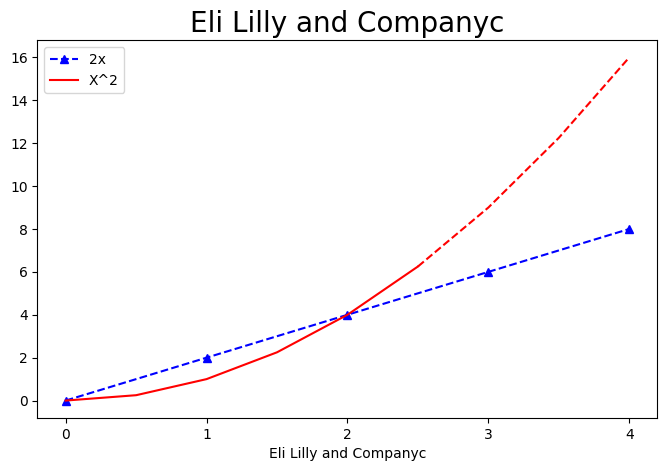

In [21]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(8,5), dpi=100)

# Line 1

# Keyword Argument Notation
#plt.plot(x,y, label='2x', color='red', linewidth=2, marker='.', linestyle='--', markersize=10, markeredgecolor='blue')

# Shorthand notation
# fmt = '[color][marker][line]'
plt.plot(x,y, 'b^--', label='2x')

## Line 2

# select interval we want to plot points at
x2 = np.arange(0,4.5,0.5)

# Plot part of the graph as line
plt.plot(x2[:6], x2[:6]**2, 'r', label='X^2')

# Plot remainder of graph as a dot
plt.plot(x2[5:], x2[5:]**2, 'r--')

# Add a title (specify font parameters with fontdict)
plt.title('Eli Lilly and Companyc', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('Eli Lilly and Companyc')

# X, Y axis Tickmarks (scale of your graph)
plt.xticks([0,1,2,3,4,])
#plt.yticks([0,2,4,6,8,10])

# Add a legend
plt.legend()

# Save figure (dpi 300 is good when saving so graph has high resolution)
plt.savefig('mygraph.png', dpi=300)

# Show plot
plt.show()

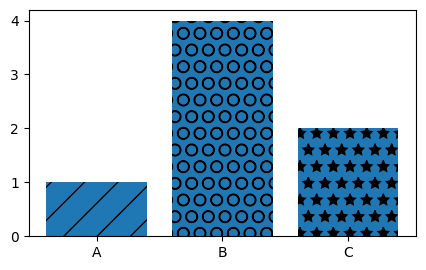

In [22]:
labels = ['A', 'B', 'C']
values = [1,4,2]

plt.figure(figsize=(5,3), dpi=100)

bars = plt.bar(labels, values)

patterns = ['/', 'O', '*']
for bar in bars:
    bar.set_hatch(patterns.pop(0))

plt.savefig('barchart.png', dpi=300)

plt.show()